<a href="https://colab.research.google.com/github/DBCooper200/project/blob/main/basicmlprogramexample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

simple program to learn from area vs price data and predict prices for unknown area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [47]:
df=pd.read_csv("areavsprice.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


df stands for dataframe which means a 2d structure containing rows and columns essentially a table

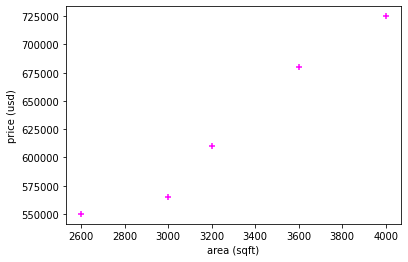

In [13]:
%matplotlib inline
plt.xlabel("area (sqft)")
plt.ylabel("price (usd)")
plt.scatter(df.area, df.price, color="magenta", marker="+")

In [32]:
reg=linear_model.LinearRegression()
ar=df.area.values.reshape(-1,1)
pr=df.price.values.reshape(-1,1)
reg.fit(df[['area']], df.price)

LinearRegression()

now this linear regression model can be used for prediction

fit() is implemented by every estimator and it accepts an input for the sample data (X) and for supervised models it also accepts an argument for labels (i.e. target data y ).

Now that we have trained our model, the next step typically involves predictions over the testing set. To do so, we need to call the method predict() that will essentially use the learned parameters by fit() in order to perform predictions on new, unseen test data points.

fit_predict() is more relevant to unsupervised or transductive estimators. Essentially, this method will fit and perform predictions over training data thus, is more appropriate when performing operations such as clustering.

In [36]:
val=5000
reg.predict([[val]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

modify the above val variable to predict prices of different areas

In [38]:
reg.coef_

array([135.78767123])

In [40]:
reg.intercept_

180616.43835616432

wkt y=mx+b is the line equation in our problem price=m*area+y 

y is intercept and m is coeff

In [42]:
reg.coef_*val+reg.intercept_

array([859554.79452055])

the above equation when compared to the value obtsined from prediction is similar it complies with y=mx+c equation

now we will provide a dataset containing areas only and let the model predict prices

In [46]:
df1=pd.read_csv("area.csv")
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [49]:
reg.predict(df1)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [50]:
p=reg.predict(df1)

after storing the array of predicted prices we can create a column in df1 with the name prices

In [52]:
df1['prices']=p
df1

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [61]:
df1.to_csv("predictions.csv")

the above command allows creation of a new csv file


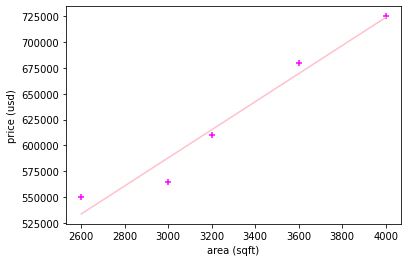

In [64]:
%matplotlib inline
plt.xlabel("area (sqft)")
plt.ylabel("price (usd)")
plt.scatter(df.area, df.price, color="magenta", marker="+")
plt.plot(df.area,reg.predict(df[['area']]),color='pink')